This notebook defines a datatype for quality traceability of all SysML elements.

1. Definition.
2. Usage example.
3. Filtering example.

In [13]:
package 'TracingAnnotations' {
	 
	import Base::*;
	import ScalarValues::*;
	import Time::TimeInstantValue;
	import IntegerFunctions::*;
	
    
    
	attribute def ConfidenceTracing {
		attribute confidence : Real;
		assert constraint confBtz0n1  { confidence >= 0.0 && confidence <= 1.0 } 
		attribute description : String;
		attribute impact : Anything[*];
	}
	 
	attribute def ExplainableTracing {
		attribute description : String;
		attribute confidence : Real;
        assert constraint confBtz0n1  { confidence >= 0.0 && confidence <= 1.0 } 
		attribute evidence : Evidence;
		attribute agent : Agent;
		attribute impact : Anything[*];
	}  
	
	attribute def Agent {
		attribute description : String;
	}
	
	attribute def HumanAgent :> Agent {
		attribute role : String;
	}
	
	attribute def MachineAgent :> Agent {
		attribute type : String;
	}
	
	attribute def Evidence {
		attribute description : String; 
		attribute confidence : Real; 
	} 
	
	attribute def AnnotationEvidence :> Evidence {
		attribute explanation : String;
	}
	
	attribute def RuleEvidence :> Evidence {
		attribute rule : String;
		attribute parameters : String[*];
		attribute executionDate : TimeInstantValue;
	}
	
	attribute def AIEvidence :> Evidence {
		attribute algorithm : String;
		attribute parameters : String[*];
		attribute executionDate : TimeInstantValue;
		attribute precision : Real;
		assert constraint { precision >= 0.0 && precision <= 1.0 } 
		attribute recall : Real;
		assert constraint { recall >= 0.0 && recall <= 1.0 } 
	}
    
   
    attribute def TraceType {
        attribute tracetype : TraceTypes;
        //assert constraint { level >= 0.0 && level <= 1.0
    }
    
    enum def TraceTypes :> String {
        typeA = "ApplicationType"; 
        typeE = "EngineeringType"; 
    }
 }

Package TracingAnnotations (371f59cb-fc2d-493a-8f6d-228e0164496e)


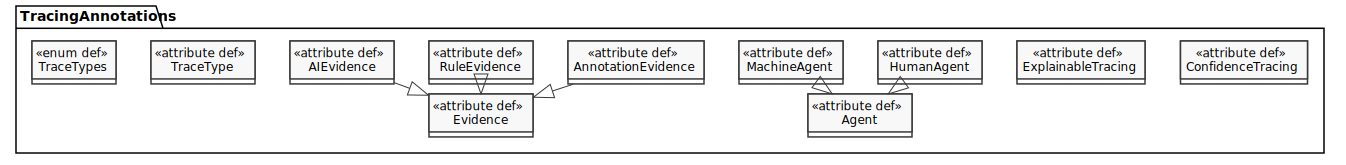

In [14]:
%viz --view=interconnection TracingAnnotations

In [16]:
package Tracing_SimpleExample {
	import TracingAnnotations::*;
	
	
	part vehiculetest {
		part wheel: Anything;
	}
	part vehiculetest2 :> vehiculetest {}
	
	
	attribute ev_vehiculetest : AIEvidence {
		:>> algorithm = "ROUGE";
		:>> parameters = {};
		:>> executionDate { :>> num = 0123456;}		
		:>> precision = 0.9;
		:>> recall = 0.9;
	}
	
	attribute ag_vehiculetest : MachineAgent {
		:>> type = "NLP_AI_ROUGE";
		:>> description = "Something about the use of AI for NLP in Sw Eng.";
	}
	
	connection testLink2 connect vehiculetest.wheel to vehiculetest2.wheel {
		/* Tracing information. */
		@ConfidenceTracing {
			confidence = 0.95;
			description = "connection btw vehiculetest*.wheel";
		}
	}
	
	connection testLink connect vehiculetest.wheel to vehiculetest2.wheel {
		@ExplainableTracing {
			description = "Something";
			confidence = 0.95;
			evidence = (ev_vehiculetest);
			agent = ag_vehiculetest;
		}
	}
	
	
	connection testLink3 connect vehiculetest.wheel to vehiculetest2.wheel;
	metadata testLink3_md: ExplainableTracing about testLink3 {
		description = "Something";
			confidence = 0.95;
			evidence = (ev_vehiculetest);
			agent = ag_vehiculetest;
	}
    
   
}
	

Package Tracing_SimpleExample (8a8ef856-6ab6-40f3-a3c1-2bda177c2fa2)


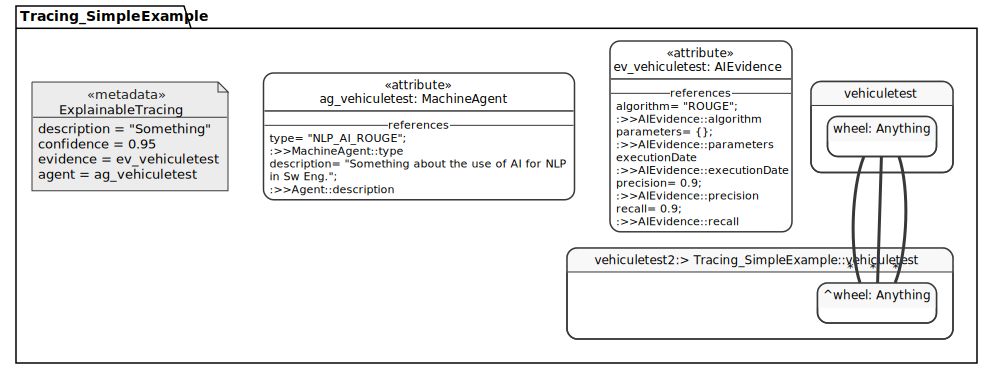

In [17]:
%viz --view=interconnection Tracing_SimpleExample

In [18]:
package Tracing_FilterExample {
	import TracingAnnotations::*;	
    /* Elements of the system. */
	part end1 {}
	part end2 {}
	part end3 {}
	part end4 {}
	part end5 {}
	part end6 {}
	part end7 {}
	part end8 {}
	
	/* Trace links */
	connection testLink95 connect end1 to end2 {
        @ConfidenceTracing { confidence = 0.95; } 
        @TraceType {tracetype = TraceTypes::typeA;}
    }
    
	connection testLink85 connect end1 to end3 
      {@ConfidenceTracing { confidence = 0.85; }}
	connection testLink75 connect end1 to end4 
      {@ConfidenceTracing { confidence = 0.75; } @TraceType {tracetype = TraceTypes::typeA;}}
	connection testLink65 connect end5 to end6 
      {@ConfidenceTracing { confidence = 0.65; }}
	connection testLink55 connect end6 to end7 
      {@ConfidenceTracing { confidence = 0.55; }}
	connection testLink45 connect end7 to end8 
      {@ConfidenceTracing { confidence = 0.45; } @TraceType {tracetype = TraceTypes::typeE;}}
	connection testLink35 connect end8 to end7 
      {@ConfidenceTracing { confidence = 0.35; }}
	connection testLink25 connect end8 to end6 
      {@ConfidenceTracing { confidence = 0.25; } @TraceType {tracetype = TraceTypes::typeE;}}
}

Package Tracing_FilterExample (8fa1f879-0a24-48c0-8c32-f490672ee182)


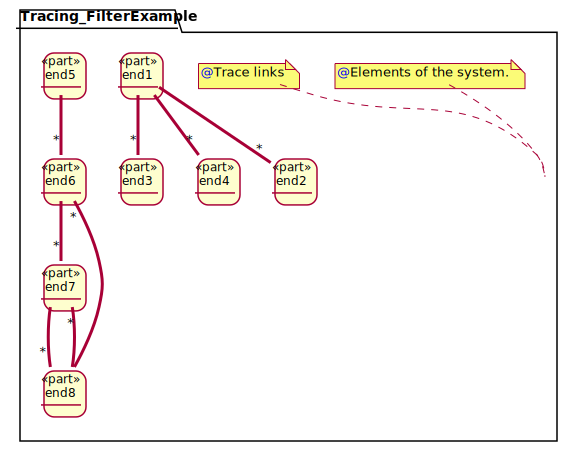

In [39]:
%viz --view tree --view mixed --style stdcolor --style showlib Tracing_FilterExample

In [32]:
%export Tracing_FilterExample

....

<a download="Tracing_FilterExample.json" href="data:application/json;base64,WwogIHsKICAgICJwYXlsb2FkIjogewogICAgICAiaWRlbnRpZmllciI6ICJkNmUzYWE5Mi02ODBkLTQyZTgtOTNlMS04NWUyMjJhNjgwYjciLAogICAgICAiQHR5cGUiOiAiUGFja2FnZSIsCiAgICAgICJxdWFsaWZpZWROYW1lIjogIkJhc2UiLAogICAgICAiYWxpYXNJZCI6IFtdLAogICAgICAibmFtZSI6ICJCYXNlIiwKICAgICAgImVmZmVjdGl2ZU5hbWUiOiAiQmFzZSIKICAgIH0sCiAgICAiaWRlbnRpdHkiOiB7CiAgICAgICJAaWQiOiAiZDZlM2FhOTItNjgwZC00MmU4LTkzZTEtODVlMjIyYTY4MGI3IgogICAgfQogIH0sCiAgewogICAgInBheWxvYWQiOiB7CiAgICAgICJAdHlwZSI6ICJJbXBvcnQiLAogICAgICAib3duZWRSZWxhdGVkRWxlbWVudCI6IFtdLAogICAgICAic291cmNlIjogWwogICAgICAgIHsKICAgICAgICAgICJAaWQiOiAiZDJjMzJlNmUtOWE4YS00MTdkLWEyYjMtNzliMjA4NTJiZGViIgogICAgICAgIH0KICAgICAgXSwKICAgICAgIm93bmluZ1JlbGF0ZWRFbGVtZW50IjogewogICAgICAgICJAaWQiOiAiZDJjMzJlNmUtOWE4YS00MTdkLWEyYjMtNzliMjA4NTJiZGViIgogICAgICB9LAogICAgICAiaXNSZWN1cnNpdmUiOiBmYWxzZSwKICAgICAgImRvY3VtZW50YXRpb25Db21tZW50IjogW10sCiAgICAgICJpZGVudGlmaWVyIjogImI4NWQ3NTc2LWUwMTAtNDlkMS05NTM4LWNkMmFiMGFkODUyYiIsCiAgICAgICJvd25lZEVsZW1lbnQiOiBbXSwKICAgICAgIm93bmVkQW5ub3RhdGlvbiI6IFtdLAogICAgICAidmlzaWJpbGl0eSI6ICJQVUJMSUMiLAogICAgICAib3duZWRSZWxhdGlvbnNoaXAiOiBbXSwKICAgICAgImRvY3VtZW50YXRpb24iOiBbXSwKICAgICAgInRhcmdldCI6IFsKICAgICAgICB7CiAgICAgICAgICAiQGlkIjogImQ2ZTNhYTkyLTY4MGQtNDJlOC05M2UxLTg1ZTIyMmE2ODBiNyIKICAgICAgICB9CiAgICAgIF0sCiAgICAgICJvd25lZFRleHR1YWxSZXByZXNlbnRhdGlvbiI6IFtdLAogICAgICAiYWxpYXNJZCI6IFtdLAogICAgICAicmVsYXRlZEVsZW1lbnQiOiBbCiAgICAgICAgewogICAgICAgICAgIkBpZCI6ICJkMmMzMmU2ZS05YThhLTQxN2QtYTJiMy03OWIyMDg1MmJkZWIiCiAgICAgICAgfSwKICAgICAgICB7CiAgICAgICAgICAiQGlkIjogImQ2ZTNhYTkyLTY4MGQtNDJlOC05M2UxLTg1ZTIyMmE2ODBiNyIKICAgICAgICB9CiAgICAgIF0sCiAgICAgICJpbXBvcnRPd25pbmdOYW1lc3BhY2UiOiB7CiAgICAgICAgIkBpZCI6ICJkMmMzMmU2ZS05YThhLTQxN2QtYTJiMy03OWIyMDg1MmJkZWIiCiAgICAgIH0sCiAgICAgICJpc0ltcG9ydEFsbCI6IGZhbHNlLAogICAgICAiaW1wb3J0ZWROYW1lc3BhY2UiOiB7CiAgICAgICAgIkBpZCI6ICJkNmUzYWE5Mi02ODBkLTQyZTgtOTNlMS04NWUyMjJhNjgwYjciCiAgICAgIH0KICAgIH0sCiAgICAiaWRlbnRpdHkiOiB7CiAgICAgICJAaWQiOiAiYjg1ZDc1NzYtZTAxMC00OWQxLTk1MzgtY2QyYWIwYWQ4NTJiIgogICAgfQogIH0sCiAgewogICAgInBheWxvYWQiOiB7CiAgICAgICJpZGVudGlmaWVyIjogImZmNDExMDcwLWUxMjctNDIzNy1hMmQzLTZhMjZmMjQwMzM2YSIsCiAgICAgICJAdHlwZSI6ICJQYWNrYWdlIiwKICAgICAgInF1YWxpZmllZE5hbWUiOiAiU2NhbGFyVmFsdWVzIiwKICAgICAgImFsaWFzSWQiOiBbXSwKICAgICAgIm5hbWUiOiAiU2NhbGFyVmFsdWVzIiwKICAgICAgImVmZmVjdGl2ZU5hbWUiOiAiU2NhbGFyVmFsdWVzIgogICAgfSwKICAgICJpZGVudGl0eSI6IHsKICAgICAgIkBpZCI6ICJmZjQxMTA3MC1lMTI3LTQyMzctYTJkMy02YTI2ZjI0MDMzNmEiCiAgICB9CiAgfSwKICB7CiAgICAicGF5bG9hZCI6IHsKICAgICAgIkB0eXBlIjogIkltcG9ydCIsCiAgICAgICJvd25lZFJlbGF0ZWRFbGVtZW50IjogW10sCiAgICAgICJzb3VyY2UiOiBbCiAgICAgICAgewogICAgICAgICAgIkBpZCI6ICJkMmMzMmU2ZS05YThhLTQxN2QtYTJiMy03OWIyMDg1MmJkZWIiCiAgICAgICAgfQogICAgICBdLAogICAgICAib3duaW5nUmVsYXRlZEVsZW1lbnQiOiB7CiAgICAgICAgIkBpZCI6ICJkMmMzMmU2ZS05YThhLTQxN2QtYTJiMy03OWIyMDg1MmJkZWIiCiAgICAgIH0sCiAgICAgICJpc1JlY3Vyc2l2ZSI6IGZhbHNlLAogICAgICAiZG9jdW1lbnRhdGlvbkNvbW1lbnQiOiBbXSwKICAgICAgImlkZW50aWZpZXIiOiAiMmVjMGJlYzctZjE0OC00YTIxLWFmOWMtMmYwMzVmMjMwMjY3IiwKICAgICAgIm93bmVkRWxlbWVudCI6IFtdLAogICAgICAib3duZWRBbm5vdGF0aW9uIjogW10sCiAgICAgICJ2aXNpYmlsaXR5IjogIlBVQkxJQyIsCiAgICAgICJvd25lZFJlbGF0aW9uc2hpcCI6IFtdLAogICAgICAiZG9jdW1lbnRhdGlvbiI6IFtdLAogICAgICAidGFyZ2V0IjogWwogICAgICAgIHsKICAgICAgICAgICJAaWQiOiAiZmY0MTEwNzAtZTEyNy00MjM3LWEyZDMtNmEyNmYyNDAzMzZhIgogICAgICAgIH0KICAgICAgXSwKICAgICAgIm93bmVkVGV4dHVhbFJlcHJlc2VudGF0aW9uIjogW10sCiAgICAgICJhbGlhc0lkIjogW10sCiAgICAgICJyZWxhdGVkRWxlbWVudCI6IFsKICAgICAgICB7CiAgICAgICAgICAiQGlkIjogImQyYzMyZTZlLTlhOGEtNDE3ZC1hMmIzLTc5YjIwODUyYmRlYiIKICAgICAgICB9LAogICAgICAgIHsKICAgICAgICAgICJAaWQiOiAiZmY0MTEwNzAtZTEyNy00MjM3LWEyZDMtNmEyNmYyNDAzMzZhIgogICAgICAgIH0KICAgICAgXSwKICAgICAgImltcG9ydE93bmluZ05hbWVzcGFjZSI6IHsKICAgICAgICAiQGlkIjogImQyYzMyZTZlLTlhOGEtNDE3ZC1hMmIzLTc5YjIwODUyYmRlYiIKICAgICAgfSwKICAgICAgImlzSW1wb3J0QWxsIjogZmFsc2UsCiAgICAgICJpbXBvcnRlZE5hbWVzcGFjZSI6IHsKICAgICAgICAiQGlkIjogImZmNDExMDcwLWUxMjctNDIzNy1hMmQzLTZhMjZmMjQwMzM2YSIKICAgICAgfQogICAgfSwKICAgICJp

In [3]:
	
import TracingAnnotations::*;
/* Filter example - full notation */
package ConfidenceLevel {
	/* Connections that satisfy a threshold confidence level (0.5). */
    import Tracing_FilterExample::**;
    filter @ConfidenceTracing && ConfidenceTracing::confidence >= 0.5 ;
}

Comment (bdc339a2-a2ee-4bb2-a3aa-7dedcd367fc2)
Package ConfidenceLevel (890723f2-28ff-4968-8fc3-28b307969481)


In [4]:
%list ConfidenceLevel::*

Comment (87c94c2f-8a46-4e4d-a93a-23df2e2bd415)
OperatorExpression (56cf19bc-7972-41bf-b3b9-346fe6f22fb7)
AnnotatingFeature (3cc54778-9579-44bd-b12a-a64ac45159bc)
AnnotatingFeature (44d7d315-41db-4377-9a26-595a3370a1de)
AnnotatingFeature (34a0342a-2ba7-4e09-8900-bc38b99afc9c)
AnnotatingFeature (3f33f159-a2f2-4ff0-ac55-84dca5b2ad2c)
AnnotatingFeature (8a26901d-e1de-49ba-9c0c-cd5216a0874d)
ConnectionUsage testLink55 (8d0ec5c3-dce0-4c1c-9f06-9aff7e3c0c20)
ConnectionUsage testLink65 (f1a590e1-73b8-45ee-8a99-a547f42b8b26)
ConnectionUsage testLink75 (8ba7df27-8f4b-47bd-b80c-fe4423b0c356)
ConnectionUsage testLink85 (69268500-d2f3-4bce-aa68-ef81e9fd52e3)
ConnectionUsage testLink95 (7b1a3d84-39d0-4271-8db5-e0d3d6c65c7d)


In [ ]:
%export ConfidenceLevel

In [5]:
import TracingAnnotations::*;
	/* Filter example - full notation */
	package ConfidenceLevelnType {
		/* Connections that are of Engineering type (TypeE). */
        import Tracing_FilterExample::**;
        filter @TraceType && TraceType::tracetype == TraceTypes::typeE;
    }

Comment (8d42541b-5d95-445f-ab6b-e9d3fb195f87)
Package ConfidenceLevelnType (c464c606-d68b-4ac8-819f-f1e282493628)


In [9]:
%list ConfidenceLevelnType::*

Comment (0bf0ffef-1665-4fd3-ab06-f3d31985930b)
OperatorExpression (b7d2c7d4-fe6e-4f21-bb01-9212dc7c3b8f)


In [ ]:
%viz ConfidenceLevelnType ConfidenceLevel

Usage: %publish <NAME>

Publish the model elements rooted in <NAME> to the repository. <NAME> must be fully qualified.
